In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [2]:
df = pd.read_csv('/Users/bsameera/Metis_DS/2_Linear_Regression/Project/hostels_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1665 non-null   int64  
 1   Overall_Rating              1665 non-null   float64
 2   name                        1665 non-null   object 
 3   Security_Rating             1376 non-null   float64
 4   Location_Rating             1376 non-null   float64
 5   Staff_Rating                1376 non-null   float64
 6   Atmosphere_Rating           1376 non-null   float64
 7   Cleanliness_Rating          1376 non-null   float64
 8   Facilities_Rating           1376 non-null   float64
 9   Value for Money_Rating      1376 non-null   float64
 10  breakfastincluded           1665 non-null   int64  
 11  freewifi                    1665 non-null   int64  
 12  linenincluded               1665 non-null   int64  
 13  lockers                     1665 

In [3]:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1376 entries, 0 to 1664
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1376 non-null   int64  
 1   Overall_Rating              1376 non-null   float64
 2   name                        1376 non-null   object 
 3   Security_Rating             1376 non-null   float64
 4   Location_Rating             1376 non-null   float64
 5   Staff_Rating                1376 non-null   float64
 6   Atmosphere_Rating           1376 non-null   float64
 7   Cleanliness_Rating          1376 non-null   float64
 8   Facilities_Rating           1376 non-null   float64
 9   Value for Money_Rating      1376 non-null   float64
 10  breakfastincluded           1376 non-null   int64  
 11  freewifi                    1376 non-null   int64  
 12  linenincluded               1376 non-null   int64  
 13  lockers                     1376 

In [4]:
df = df.drop(axis=1, columns=['Unnamed: 0'])
df.head()

,Overall_Rating,name,Security_Rating,Location_Rating,Staff_Rating,Atmosphere_Rating,Cleanliness_Rating,Facilities_Rating,Value for Money_Rating,breakfastincluded,...,hotshowers,restaurant,bar,mealsavailable,vendingmachines,cafe,tea&coffeemakingfacilities,24hourreception,24hoursecurity,starting_prices
0,6.9,Auberge Internationale des Jeunes,7.5,8.0,7.5,6.5,6.0,6.0,6.8,1,...,1,0,0,0,1,0,0,1,0,122.0
1,8.1,St Christopher's Inn Gare du Nord,8.6,8.2,8.4,7.9,7.8,7.8,8.1,0,...,1,1,1,1,1,1,0,1,1,42.0
2,8.6,JO&JOE Paris - Gentilly,9.2,7.6,9.1,8.7,8.2,8.6,8.5,0,...,1,1,1,1,0,1,0,1,1,29.0
3,8.0,Generator Paris,8.6,8.0,8.3,7.5,7.8,7.7,7.9,0,...,0,1,1,0,1,1,0,1,1,38.0
4,8.3,St Christopher's Inn Canal,8.6,8.0,8.8,8.3,7.8,7.9,8.3,0,...,1,1,1,1,1,1,0,1,1,29.0


In [5]:
df.reset_index(inplace=True)
df.tail()

,index,Overall_Rating,name,Security_Rating,Location_Rating,Staff_Rating,Atmosphere_Rating,Cleanliness_Rating,Facilities_Rating,Value for Money_Rating,...,hotshowers,restaurant,bar,mealsavailable,vendingmachines,cafe,tea&coffeemakingfacilities,24hourreception,24hoursecurity,starting_prices
1371,1658,7.0,Garden View Hostel,8.0,8.0,6.0,7.0,6.0,7.0,7.0,...,1,0,0,0,1,0,0,1,1,3.0
1372,1660,6.0,Safary Hotel,6.5,8.0,6.5,5.0,4.5,5.5,6.0,...,1,0,0,0,0,1,0,1,1,4.0
1373,1662,9.6,Valencia Hostel,9.7,9.3,9.9,9.4,9.6,9.4,9.6,...,1,1,0,1,0,0,0,1,1,20.0
1374,1663,7.2,Bob Marley Hostel Cairo,7.3,6.7,10.0,7.3,6.7,6.0,6.7,...,0,0,0,0,0,1,0,1,1,10.0
1375,1664,9.6,1 Step from St Peter,10.0,9.7,9.7,9.4,9.7,9.1,9.4,...,1,0,0,0,0,0,0,0,0,52.0


In [6]:
df.drop(axis=1, columns=['index'], inplace=True)

In [7]:
df.tail()

,Overall_Rating,name,Security_Rating,Location_Rating,Staff_Rating,Atmosphere_Rating,Cleanliness_Rating,Facilities_Rating,Value for Money_Rating,breakfastincluded,...,hotshowers,restaurant,bar,mealsavailable,vendingmachines,cafe,tea&coffeemakingfacilities,24hourreception,24hoursecurity,starting_prices
1371,7.0,Garden View Hostel,8.0,8.0,6.0,7.0,6.0,7.0,7.0,1,...,1,0,0,0,1,0,0,1,1,3.0
1372,6.0,Safary Hotel,6.5,8.0,6.5,5.0,4.5,5.5,6.0,1,...,1,0,0,0,0,1,0,1,1,4.0
1373,9.6,Valencia Hostel,9.7,9.3,9.9,9.4,9.6,9.4,9.6,1,...,1,1,0,1,0,0,0,1,1,20.0
1374,7.2,Bob Marley Hostel Cairo,7.3,6.7,10.0,7.3,6.7,6.0,6.7,1,...,0,0,0,0,0,1,0,1,1,10.0
1375,9.6,1 Step from St Peter,10.0,9.7,9.7,9.4,9.7,9.1,9.4,1,...,1,0,0,0,0,0,0,0,0,52.0


In [8]:
df.corr()

,Overall_Rating,Security_Rating,Location_Rating,Staff_Rating,Atmosphere_Rating,Cleanliness_Rating,Facilities_Rating,Value for Money_Rating,breakfastincluded,freewifi,...,hotshowers,restaurant,bar,mealsavailable,vendingmachines,cafe,tea&coffeemakingfacilities,24hourreception,24hoursecurity,starting_prices
Overall_Rating,1.000000,0.940139,0.902230,0.938115,0.947439,0.948480,0.954708,0.950788,-0.003806,0.055116,...,0.100789,-0.021466,0.093873,-0.035438,0.118318,0.037818,NaN,0.006887,-0.019158,0.037636
Security_Rating,0.940139,1.000000,0.959413,0.971751,0.961930,0.969776,0.966836,0.968589,-0.025085,0.042600,...,0.086287,-0.025281,0.095580,-0.043048,0.137987,0.030296,NaN,0.027425,-0.006626,0.039059
Location_Rating,0.902230,0.959413,1.000000,0.954135,0.941814,0.935363,0.938978,0.951125,-0.024533,0.053962,...,0.096679,-0.012098,0.088335,-0.042550,0.144516,0.029599,NaN,0.030071,0.016653,0.033658
Staff_Rating,0.938115,0.971751,0.954135,1.000000,0.969448,0.959279,0.963737,0.970344,-0.022515,0.040025,...,0.094045,-0.022922,0.086590,-0.037011,0.137018,0.035025,NaN,0.022350,-0.000400,0.032967
Atmosphere_Rating,0.947439,0.961930,0.941814,0.969448,1.000000,0.963151,0.972900,0.969845,-0.012386,0.056329,...,0.107055,-0.002748,0.101262,-0.003267,0.115229,0.064220,NaN,0.015683,-0.001871,0.029034
Cleanliness_Rating,0.948480,0.969776,0.935363,0.959279,0.963151,1.000000,0.974956,0.966224,-0.016300,0.058484,...,0.089165,-0.014192,0.084186,-0.035275,0.112473,0.036797,NaN,0.010127,-0.007569,0.044854
Facilities_Rating,0.954708,0.966836,0.938978,0.963737,0.972900,0.974956,1.000000,0.979014,-0.008822,0.048972,...,0.103223,-0.008532,0.096944,-0.025948,0.115958,0.039803,NaN,0.009850,-0.004286,0.033882
Value for Money_Rating,0.950788,0.968589,0.951125,0.970344,0.969845,0.966224,0.979014,1.000000,-0.012956,0.050149,...,0.107382,-0.015336,0.080850,-0.032646,0.115200,0.035203,NaN,-0.000371,-0.004537,0.009828
breakfastincluded,-0.003806,-0.025085,-0.024533,-0.022515,-0.012386,-0.016300,-0.008822,-0.012956,1.000000,0.031104,...,0.024304,-0.027612,-0.066763,0.043795,-0.073040,0.009994,NaN,0.042742,0.071713,-0.028716
freewifi,0.055116,0.042600,0.053962,0.040025,0.056329,0.058484,0.048972,0.050149,0.031104,1.000000,...,0.230387,0.045194,0.061738,0.099445,0.031975,0.110488,NaN,0.043882,0.108717,-0.113909


In [9]:
y = df['Overall_Rating']
X = df.drop(axis=1, columns=['Overall_Rating', 'name'])
# X.head()

X = sm.add_constant(X)

# Define the model structure
model = sm.OLS(y, X)

# Fit the model
fit = model.fit()

# Print statistics of the fitted model
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:         Overall_Rating   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     686.5
Date:                Wed, 23 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:05:22   Log-Likelihood:                -1935.3
No. Observations:                1376   AIC:                             3923.
Df Residuals:                    1350   BIC:                             4058.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [10]:
df.columns

Index(['Overall_Rating', 'name', 'Security_Rating', 'Location_Rating',
       'Staff_Rating', 'Atmosphere_Rating', 'Cleanliness_Rating',
       'Facilities_Rating', 'Value for Money_Rating', 'breakfastincluded',
       'freewifi', 'linenincluded', 'lockers', 'airconditioning', 'commonroom',
       'laundryfacilities', 'fridgefreezer', 'microwave', 'hotshowers',
       'restaurant', 'bar', 'mealsavailable', 'vendingmachines', 'cafe',
       'tea&coffeemakingfacilities', '24hourreception', '24hoursecurity',
       'starting_prices'],
      dtype='object')

In [11]:
# model with individual ratings

y = df['Overall_Rating']
X1 = df.drop(axis=1, columns=['Overall_Rating', 'name', 'Staff_Rating', 'breakfastincluded', 'freewifi', 'lockers', 'commonroom', 'laundryfacilities', 'fridgefreezer', 'microwave', 'hotshowers',
       'restaurant', 'bar', 'mealsavailable', 'vendingmachines', 'cafe',
       'tea&coffeemakingfacilities', '24hourreception', '24hoursecurity',
       'starting_prices'])

X1 = sm.add_constant(X1)

# Define the model structure
model1 = sm.OLS(y, X1)

# Fit the model
fit1 = model1.fit()

# Print statistics of the fitted model
print(fit1.summary())


                            OLS Regression Results                            
Dep. Variable:         Overall_Rating   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     2141.
Date:                Wed, 23 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:05:22   Log-Likelihood:                -1944.4
No. Observations:                1376   AIC:                             3907.
Df Residuals:                    1367   BIC:                             3954.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [12]:
# model without individual ratings
# 'Location_Rating' 

without_ratings_df = df.drop(axis=1, columns=['Security_Rating', 'Location_Rating', 'Staff_Rating', 'Cleanliness_Rating', 'Atmosphere_Rating', 'Facilities_Rating', 'Value for Money_Rating'])

without_ratings_df.corr()



,Overall_Rating,breakfastincluded,freewifi,linenincluded,lockers,airconditioning,commonroom,laundryfacilities,fridgefreezer,microwave,hotshowers,restaurant,bar,mealsavailable,vendingmachines,cafe,tea&coffeemakingfacilities,24hourreception,24hoursecurity,starting_prices
Overall_Rating,1.000000,-0.003806,0.055116,0.192492,0.218274,-0.011779,0.212572,0.055740,0.076528,0.151004,0.100789,-0.021466,0.093873,-0.035438,0.118318,0.037818,NaN,0.006887,-0.019158,0.037636
breakfastincluded,-0.003806,1.000000,0.031104,-0.028246,-0.017060,0.032678,0.015245,0.004259,0.062168,0.039091,0.024304,-0.027612,-0.066763,0.043795,-0.073040,0.009994,NaN,0.042742,0.071713,-0.028716
freewifi,0.055116,0.031104,1.000000,0.188050,0.151024,0.116452,0.115800,0.130765,0.119284,0.103705,0.230387,0.045194,0.061738,0.099445,0.031975,0.110488,NaN,0.043882,0.108717,-0.113909
linenincluded,0.192492,-0.028246,0.188050,1.000000,0.363700,0.072792,0.362589,0.176289,0.166140,0.218593,0.317901,0.064446,0.108879,0.142795,0.131683,0.186222,NaN,0.045801,0.160968,-0.076008
lockers,0.218274,-0.017060,0.151024,0.363700,1.000000,0.054750,0.457181,0.274565,0.226178,0.294703,0.346623,0.073078,0.156697,0.143105,0.140319,0.279484,NaN,0.062743,0.157159,-0.157982
airconditioning,-0.011779,0.032678,0.116452,0.072792,0.054750,1.000000,0.023295,0.067609,0.142772,0.133273,0.109291,0.009455,-0.035693,-0.006295,0.015809,0.052973,NaN,-0.024183,0.123597,-0.001023
commonroom,0.212572,0.015245,0.115800,0.362589,0.457181,0.023295,1.000000,0.277225,0.238826,0.316344,0.330424,0.041352,0.095548,0.138318,0.158034,0.279362,NaN,0.047578,0.178206,-0.165815
laundryfacilities,0.055740,0.004259,0.130765,0.176289,0.274565,0.067609,0.277225,1.000000,0.178573,0.181182,0.236208,0.125948,0.056475,0.183941,0.148948,0.198583,NaN,0.077782,0.176546,-0.106350
fridgefreezer,0.076528,0.062168,0.119284,0.166140,0.226178,0.142772,0.238826,0.178573,1.000000,0.615124,0.263347,-0.065345,-0.107567,0.086006,-0.001726,0.057026,NaN,-0.118568,0.021838,-0.083004
microwave,0.151004,0.039091,0.103705,0.218593,0.294703,0.133273,0.316344,0.181182,0.615124,1.000000,0.265042,-0.146526,-0.091983,-0.013265,0.094324,0.068819,NaN,-0.130386,0.000926,-0.065742


In [13]:
without_ratings_df['tea&coffeemakingfacilities'].value_counts()

0    1376
Name: tea&coffeemakingfacilities, dtype: int64

In [14]:
without_ratings_df = without_ratings_df.drop(axis=1, columns=['tea&coffeemakingfacilities'])
without_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376 entries, 0 to 1375
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Overall_Rating     1376 non-null   float64
 1   name               1376 non-null   object 
 2   breakfastincluded  1376 non-null   int64  
 3   freewifi           1376 non-null   int64  
 4   linenincluded      1376 non-null   int64  
 5   lockers            1376 non-null   int64  
 6   airconditioning    1376 non-null   int64  
 7   commonroom         1376 non-null   int64  
 8   laundryfacilities  1376 non-null   int64  
 9   fridgefreezer      1376 non-null   int64  
 10  microwave          1376 non-null   int64  
 11  hotshowers         1376 non-null   int64  
 12  restaurant         1376 non-null   int64  
 13  bar                1376 non-null   int64  
 14  mealsavailable     1376 non-null   int64  
 15  vendingmachines    1376 non-null   int64  
 16  cafe               1376 

In [15]:
without_ratings_df = without_ratings_df[without_ratings_df['Overall_Rating'] != 0]
without_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 0 to 1375
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Overall_Rating     1082 non-null   float64
 1   name               1082 non-null   object 
 2   breakfastincluded  1082 non-null   int64  
 3   freewifi           1082 non-null   int64  
 4   linenincluded      1082 non-null   int64  
 5   lockers            1082 non-null   int64  
 6   airconditioning    1082 non-null   int64  
 7   commonroom         1082 non-null   int64  
 8   laundryfacilities  1082 non-null   int64  
 9   fridgefreezer      1082 non-null   int64  
 10  microwave          1082 non-null   int64  
 11  hotshowers         1082 non-null   int64  
 12  restaurant         1082 non-null   int64  
 13  bar                1082 non-null   int64  
 14  mealsavailable     1082 non-null   int64  
 15  vendingmachines    1082 non-null   int64  
 16  cafe               1082 

(array([ 32.,  36.,  42.,  52.,  88., 109., 141., 181., 182., 219.]),
 array([ 6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,  8.8,  9.2,  9.6, 10. ]),
 <BarContainer object of 10 artists>)

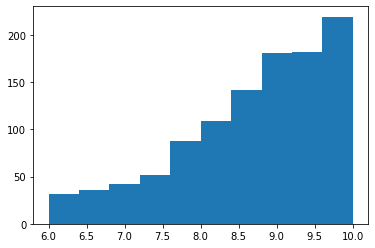

In [16]:
plt.hist(without_ratings_df['Overall_Rating'])

(array([998.,  61.,  13.,   4.,   2.,   0.,   1.,   0.,   1.,   2.]),
 array([  2.,  87., 172., 257., 342., 427., 512., 597., 682., 767., 852.]),
 <BarContainer object of 10 artists>)

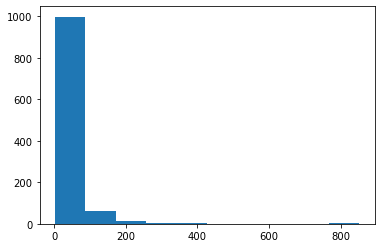

In [17]:
plt.hist(without_ratings_df['starting_prices'])

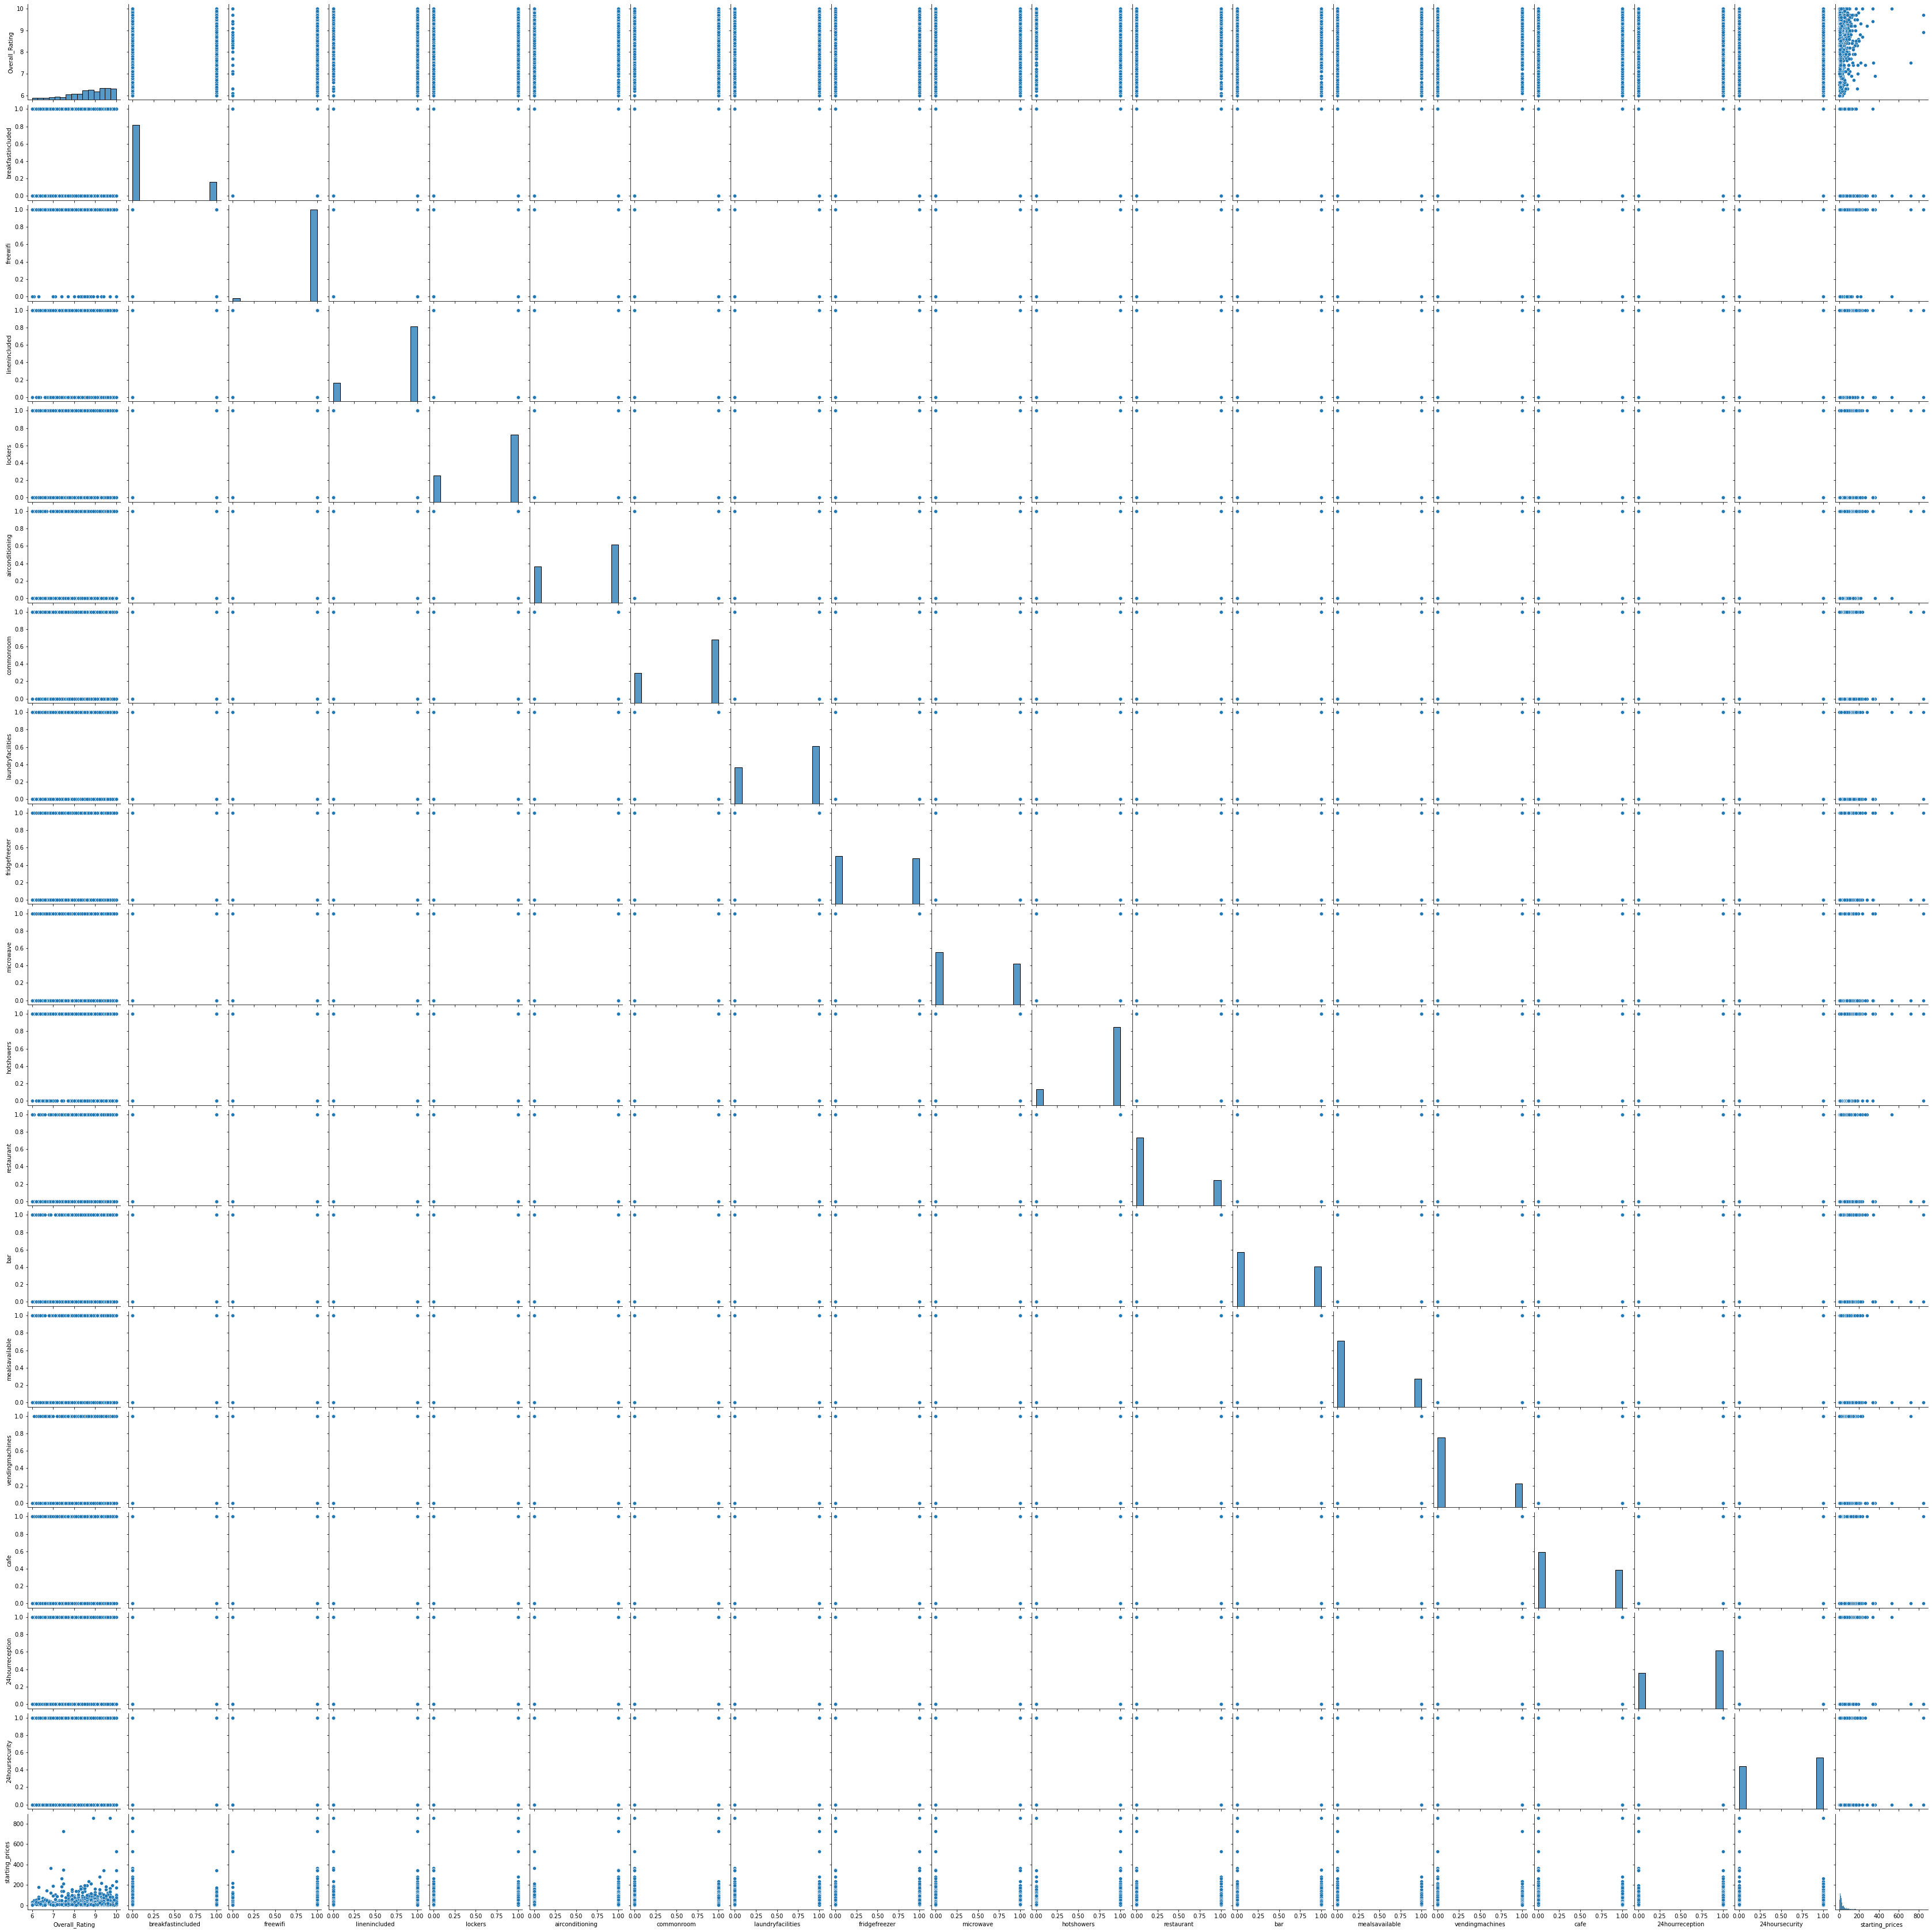

In [18]:
sns.pairplot(without_ratings_df)

In [19]:
y =  without_ratings_df['Overall_Rating']
X2 = without_ratings_df.drop(axis=1, columns=['name', 'Overall_Rating'])

X2 = sm.add_constant(X2)

# Define the model structure
model2 = sm.OLS(y, X2)

# Fit the model
fit2 = model2.fit()

# Print statistics of the fitted model
print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:         Overall_Rating   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     5.687
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           4.24e-13
Time:                        19:05:53   Log-Likelihood:                -1488.1
No. Observations:                1082   AIC:                             3014.
Df Residuals:                    1063   BIC:                             3109.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 8.0505      0.18

In [20]:
without_ratings_df['Overall_Rating'].describe()

count    1082.000000
mean        8.654806
std         1.002827
min         6.000000
25%         8.000000
50%         8.900000
75%         9.400000
max        10.000000
Name: Overall_Rating, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split

y =  np.log(without_ratings_df['Overall_Rating']+0.01)
X3 = without_ratings_df.drop(axis=1, columns=['name', 'Overall_Rating'])

X3['starting_prices_squared'] = X3['starting_prices']**3

X3, X3_test, y, y_test = train_test_split(X3, y, 
                                       test_size=.2,     
                                       random_state=42)

X3_train, X3_val, y_train, y_val = train_test_split(X3, y, 
                                       test_size=.25,     
                                       random_state=42)

model3 = LinearRegression()
lr3 = model3.fit(X3_train,y_train)

r_squared_train = lr3.score(X3_train, y_train)
r_squared_val = lr3.score(X3_val, y_val)
# r_squared_test = lr3.score(X3_test, y_test)

print(r_squared_train)
print(r_squared_val)
# print(r_squared_test)

0.08788843537803892
-0.3550211052234391


In [23]:

y =  np.log(without_ratings_df['Overall_Rating']+0.01)
X3 = without_ratings_df.drop(axis=1, columns=['name', 'Overall_Rating'])


X3, X3_test, y, y_test = train_test_split(X3, y, 
                                       test_size=.2,     
                                       random_state=42)

X3_train, X3_val, y_train, y_val = train_test_split(X3, y, 
                                       test_size=.25,     
                                       random_state=42)

model3 = LinearRegression()
lr3 = model3.fit(X3_train,y_train)

r_squared_train = lr3.score(X3_train, y_train)
r_squared_val = lr3.score(X3_val, y_val)
r_squared_test = lr3.score(X3_test, y_test)

print(r_squared_train)
print(r_squared_val)
print(r_squared_test)

0.08739981201475322
0.040762940639040846
0.03298442114666966


In [24]:
# Model 3

y = without_ratings_df['Overall_Rating']
X3 = without_ratings_df
X3['starting_prices_log'] = np.log(X3['starting_prices'])

X3 = without_ratings_df.drop(axis=1, columns=['name', 'Overall_Rating', 'starting_prices'])

X3, X3_test, y, y_test = train_test_split(X3, y, 
                                       test_size=.2,     
                                       random_state=42)

X3_train, X3_val, y_train, y_val = train_test_split(X3, y, 
                                       test_size=.25,     
                                       random_state=42)

model3 = LinearRegression()
lr3 = model3.fit(X3_train,y_train)

r_squared_train = lr3.score(X3_train, y_train)
r_squared_val = lr3.score(X3_val, y_val)
r_squared_test = lr3.score(X3_test, y_test)

print(r_squared_train)
print(r_squared_val)
print(r_squared_test)

0.08916065224212155
0.04478846922664259
0.05902872139750437


In [26]:

y = without_ratings_df['Overall_Rating']
X4 = without_ratings_df.drop(axis=1, columns=['name', 'Overall_Rating', 'starting_prices_log'])

X4, X4_test, y, y_test = train_test_split(X4, y, 
                                       test_size=.2,     
                                       random_state=42)

X4_train, X4_val, y_train, y_val = train_test_split(X4, y, 
                                       test_size=.25,     
                                       random_state=42)

model4 = LinearRegression()
lr4 = model4.fit(X4_train,y_train)

r_squared_train = lr4.score(X4_train, y_train)
r_squared_val = lr4.score(X4_val, y_val)
r_squared_test = lr4.score(X4_test, y_test)

print(r_squared_train)
print(r_squared_val)
#print(r_squared_test)

print('\n', list(zip(X4_train.columns, model4.coef_)))

0.09110175020999112
0.04695913284929143

 [('breakfastincluded', -0.01031095563642657), ('freewifi', -0.11457648515750744), ('linenincluded', -0.06893326457013077), ('lockers', -0.06900801888409656), ('airconditioning', 0.39295239321956227), ('commonroom', 0.13629474563993849), ('laundryfacilities', 0.15677346920031582), ('fridgefreezer', 0.08235281764512921), ('microwave', 0.09899893079368124), ('hotshowers', 0.01929015101990429), ('restaurant', 0.04594175257767839), ('bar', 0.05101735788485161), ('mealsavailable', 0.16415486964566725), ('vendingmachines', -0.21258615940752468), ('cafe', 0.1598855640079825), ('24hourreception', -0.037189410443308896), ('24hoursecurity', -0.17320472221602853), ('starting_prices', 0.001205753606735263)]


In [ ]:
#X4.head()

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## .fit finds the mean and standard deviation of each variable in the training set
std = StandardScaler()
std.fit(X4_train.values)

## apply the scaler to the train set
X4_tr = std.transform(X4_train.values)

## Apply the scaler to the test set
X4_te = std.transform(X4_test.values)

lr_model_ridge = Ridge(alpha = 2000)
lr_model_ridge.fit(X4_tr, y_train)
ridge_test_r2 = lr_model_ridge.score(X4_te, y_test)

print(lr_model_ridge.score(X4_tr, y_train))

print(lr_model_ridge.score(X4_te, y_test))

list(zip(X4_train.columns, lr_model_ridge.coef_))

0.04601309310565527
0.03808907352733382


[('breakfastincluded', 0.0018861476144251008),
 ('freewifi', 0.0008639410598833552),
 ('linenincluded', 0.00020777441741725767),
 ('lockers', 0.0017192055432066018),
 ('airconditioning', 0.04759291676016521),
 ('commonroom', 0.01235414856957265),
 ('laundryfacilities', 0.0233447158286232),
 ('fridgefreezer', 0.0216655838484828),
 ('microwave', 0.019178179768400028),
 ('hotshowers', 0.008061144536602555),
 ('restaurant', 0.013885703952924293),
 ('bar', 0.007329008582301456),
 ('mealsavailable', 0.023154199954288576),
 ('vendingmachines', -0.01807459181542783),
 ('cafe', 0.026562973714577217),
 ('24hourreception', -0.009641997231045024),
 ('24hoursecurity', -0.011514312864505442),
 ('starting_prices', 0.007669677970833357)]

In [ ]:
# alphas = 10**np.linspace(-2,2,200)
# # alphas = 10**np.linspace(-100,100,1000)
# ridge_model = RidgeCV(alphas = alphas, cv=5)
# ridge_model.fit(X4_tr, y_train)

# r_squared_train = ridge_model.score(X4_tr, y_train)
# r_squared_test = ridge_model.score(X4_te, y_test)

# list(zip(X4_train.columns, lr_model_ridge.coef_))
# alpha = ridge_model.alpha_

# print(r_squared_train,'\n')
# print(r_squared_test,'\n')
# print(list(zip(X4_train.columns, lr_model_ridge.coef_)), '\n')
# print(alpha)





In [ ]:
# try with lassoCV

# alphas = 10**np.linspace(-2,2,200)
# lasso_model = LassoCV(alphas = alphas, cv=5)
# lasso_model.fit(X4_tr, y_train)
# r_squared_train_lasso = lasso_model.score(X4_tr, y_train)
# r_squared_test_lasso = lasso_model.score(X4_te, y_test)
# alpha_l = lasso_model.alpha_

# print(r_squared_train_lasso)
# print(r_squared_test_lasso)
# print(list(zip(X4_train.columns, lasso_model.coef_)), '\n')
# print(alpha_l)


# result

# 0.11315618304931163 

# 0.07611498526077176 

# [('breakfastincluded', -0.007410099128248362), ('freewifi', 0.03345376778202133), 
#  ('linenincluded', 0.15725446533213874), ('lockers', 0.1677719880107337), 
#  ('airconditioning', -0.0036004122231059893), ('commonroom', 0.18112316085289), 
#  ('laundryfacilities', 0.009144646442748648), ('fridgefreezer', 0.045688645203503325), 
#  ('microwave', 0.10458803139627203), ('hotshowers', 0.05424250413040254), ('restaurant', -0.06656268751831235), 
#  ('bar', 0.08431160360375983), ('mealsavailable', -0.0896670695660048), ('vendingmachines', 0.11954170191438189), 
#  ('cafe', -0.028752895163517544), ('24hourreception', -0.012384747253333668), ('24hoursecurity', -0.04596684360903004),
#  ('starting_prices', 0.0660660344092169)] 

# 100.0

In [28]:
alphas = 10**np.linspace(-2,2,500)
lasso_model = LassoCV(alphas = alphas, cv=5)
lasso_model.fit(X4_tr, y_train)
r_squared_train_lasso = lasso_model.score(X4_tr, y_train)
r_squared_test_lasso = lasso_model.score(X4_te, y_test)
alpha_l = lasso_model.alpha_

print(r_squared_train_lasso)
print(r_squared_test_lasso)
print(list(zip(X4_train.columns, lasso_model.coef_)), '\n')
print(alpha_l)

0.07238293886538949
0.06809191746491428
[('breakfastincluded', -0.0), ('freewifi', -0.0), ('linenincluded', -0.0), ('lockers', -0.0), ('airconditioning', 0.14795988404190405), ('commonroom', 0.0), ('laundryfacilities', 0.03906768575054034), ('fridgefreezer', 0.02848824400672185), ('microwave', 0.019898404603410334), ('hotshowers', 0.0), ('restaurant', 0.0), ('bar', 0.0), ('mealsavailable', 0.042358428560006704), ('vendingmachines', -0.03467136744803275), ('cafe', 0.060322980536030316), ('24hourreception', -0.0), ('24hoursecurity', -0.024404616606579152), ('starting_prices', 0.0)] 

0.042980012064907966


In [29]:
# Model with the target variable logged and squared

y = (np.log(without_ratings_df['Overall_Rating']+0.1))**2
X5 = without_ratings_df.drop(axis=1, columns=['name', 'Overall_Rating', 'starting_prices_log'])
X5, X5_test, y, y_test = train_test_split(X5, y, 
                                       test_size=.2,     
                                       random_state=42)

X5_train, X5_val, y_train, y_val = train_test_split(X5, y, 
                                       test_size=.25,     
                                       random_state=42)

In [30]:
X5.columns

Index(['breakfastincluded', 'freewifi', 'linenincluded', 'lockers',
       'airconditioning', 'commonroom', 'laundryfacilities', 'fridgefreezer',
       'microwave', 'hotshowers', 'restaurant', 'bar', 'mealsavailable',
       'vendingmachines', 'cafe', '24hourreception', '24hoursecurity',
       'starting_prices'],
      dtype='object')

In [31]:
## .fit finds the mean and standard deviation of each variable in the training set
std = StandardScaler()
std.fit(X5_train.values)

## apply the scaler to the train set
X5_tr = std.transform(X5_train.values)

## Apply the scaler to the test set
X5_te = std.transform(X5_test.values)

alphas = 10**np.linspace(-2,2,500)
lasso_model_1 = LassoCV(alphas = alphas, cv=5)
lasso_model_1.fit(X5_tr, y_train)
r_squared_train_lasso = lasso_model_1.score(X5_tr, y_train)
r_squared_test_lasso = lasso_model_1.score(X5_te, y_test)
alpha_l = lasso_model_1.alpha_

print(r_squared_train_lasso)
print(r_squared_test_lasso)
print(list(zip(X5_train.columns, lasso_model_1.coef_)), '\n')
print(alpha_l)

0.07029557996867442
0.06596229205796955
[('breakfastincluded', -0.0), ('freewifi', -0.0), ('linenincluded', -0.0), ('lockers', 0.0), ('airconditioning', 0.07385591664722199), ('commonroom', 0.0), ('laundryfacilities', 0.02043698941794839), ('fridgefreezer', 0.014276735525038798), ('microwave', 0.010660327636224156), ('hotshowers', 0.0), ('restaurant', 0.0), ('bar', 0.0), ('mealsavailable', 0.01939683224681672), ('vendingmachines', -0.014663503670222733), ('cafe', 0.031270452430363714), ('24hourreception', -0.0), ('24hoursecurity', -0.011050373562360431), ('starting_prices', 0.0)] 

0.022115123997254887


(865,) (865,)
(865,)
MAE :  0.39012854859821056
RMSE :  0.5001040213972294


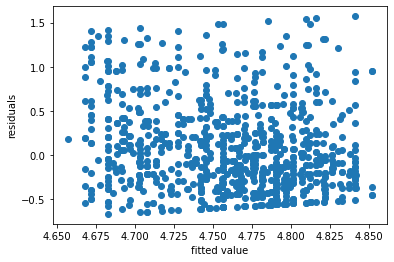

In [32]:
# residuals 
# MAE, RMSE

y_actual_train = y
y_predicted_train = lasso_model_1.predict(X5)

residuals = y_predicted_train - y_actual_train

print(y_predicted_train.shape, y_actual_train.shape)
print(residuals.shape)

# mean absolute error
mae = mean_absolute_error(y_actual_train, y_predicted_train)
print('MAE : ', mae)

# root mean squared error
rmse = np.sqrt(sum(residuals**2)/len(residuals))
print('RMSE : ', rmse)

# from math import sqrt
# rmse = sqrt(mean_squared_error(y_actual_train, y_predicted_train))
# print(rmse)

plt.scatter(y_predicted_train, residuals)
plt.xlabel('fitted value')
plt.ylabel('residuals')

plt.show()

(array([118., 177., 174., 132.,  91.,  58.,  37.,  39.,  25.,  14.]),
 array([-0.66537022, -0.44169435, -0.21801848,  0.00565739,  0.22933326,
         0.45300913,  0.67668499,  0.90036086,  1.12403673,  1.3477126 ,
         1.57138847]),
 <BarContainer object of 10 artists>)

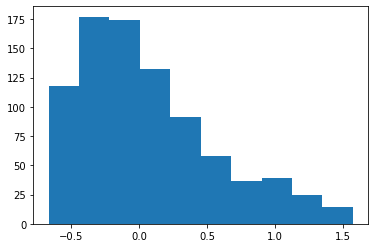

In [33]:
plt.hist(residuals)

In [34]:
np.exp(np.sqrt(y_predicted_train))[0:5]

array([9.05035856, 8.83014513, 8.78487684, 8.89419087, 8.73295032])

In [35]:
np.exp(np.sqrt(y_actual_train))[0:5]

956    10.0
267     8.9
684     6.9
693     9.3
312     8.3
Name: Overall_Rating, dtype: float64

In [36]:
predicted_overall_rating = sum(y_predicted_train)/len(y_predicted_train)
predicted_overall_rating = round(np.exp(np.sqrt(predicted_overall_rating)), 2)
predicted_overall_rating

8.86

In [37]:
actual_overall_rating = sum(y_actual_train)/len(y_actual_train)
actual_overall_rating = round(np.exp(np.sqrt(actual_overall_rating)), 2)
actual_overall_rating

8.73